In [103]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import reset_ramsey
from scipy.stats.mstats import winsorize
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white

#Set the working directory
os.chdir('/Users/morganrhyswilliams/Library/CloudStorage/OneDrive-UniversityofBath/MSc Finance/Econometrics') # For Mac '/Users/morganrhyswilliams/Library/CloudStorage/OneDrive-UniversityofBath/MSc Finance/Econometrics'
#For Windows 'C:/Users/morga/OneDrive - University of Bath/MSc Finance/Econometrics'
#Load the data
gw_data = pd.read_excel(os.path.join('data','Goyal_Welch_data.xlsx'), index_col=0)

#Convert the 'yyyymm' index to datetime format
gw_data.index = pd.to_datetime(gw_data.index.astype(str), format='%Y%m')

#Rename the index to 'Date'
gw_data.index.name = 'Date'

#Remove missing values
gw_data = gw_data.dropna()

#Check the result after changes
gw_data.head()

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,CRSP_SPvw,CRSP_SPvwx
Date,,,,,,,,,,,,,,,
1926-12-01,13.49,0.6900,1.240,0.441476,0.0307,0.0468,0.0568,0.0354,0.050876,0.0028,0.000000,0.0078,0.0056,0.026047,0.020321
1927-01-01,13.21,0.6967,1.229,0.443706,0.0323,0.0466,0.0561,0.0351,0.050824,0.0025,-0.011299,0.0075,0.0056,-0.002910,-0.005579
1927-02-01,13.84,0.7033,1.218,0.428501,0.0329,0.0467,0.0559,0.0347,0.051668,0.0026,-0.005714,0.0088,0.0069,0.045522,0.040566
1927-03-01,13.93,0.7100,1.208,0.469765,0.0320,0.0462,0.0554,0.0331,0.046357,0.0030,-0.005747,0.0253,0.0083,0.007324,0.002610
1927-04-01,14.17,0.7167,1.197,0.456754,0.0339,0.0458,0.0548,0.0333,0.050514,0.0025,0.000000,-0.0005,0.0055,0.013021,0.010907


In [104]:
gw_data

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,CRSP_SPvw,CRSP_SPvwx
Date,,,,,,,,,,,,,,,
1926-12-01,13.49,0.690000,1.240000,0.441476,0.0307,0.0468,0.0568,0.0354,0.050876,0.0028,0.000000,0.007800,0.005600,0.026047,0.020321
1927-01-01,13.21,0.696700,1.229000,0.443706,0.0323,0.0466,0.0561,0.0351,0.050824,0.0025,-0.011299,0.007500,0.005600,-0.002910,-0.005579
1927-02-01,13.84,0.703300,1.218000,0.428501,0.0329,0.0467,0.0559,0.0347,0.051668,0.0026,-0.005714,0.008800,0.006900,0.045522,0.040566
1927-03-01,13.93,0.710000,1.208000,0.469765,0.0320,0.0462,0.0554,0.0331,0.046357,0.0030,-0.005747,0.025300,0.008300,0.007324,0.002610
1927-04-01,14.17,0.716700,1.197000,0.456754,0.0339,0.0458,0.0548,0.0333,0.050514,0.0025,0.000000,-0.000500,0.005500,0.013021,0.010907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,3955.00,64.885405,188.806667,0.227429,0.0263,0.0407,0.0515,0.0290,-0.009732,0.0019,-0.000354,-0.042089,-0.029326,-0.040305,-0.042052
2022-09-01,3585.62,65.318305,187.080000,0.249478,0.0313,0.0459,0.0569,0.0352,-0.011292,0.0019,0.002151,-0.076885,-0.052554,-0.091495,-0.092876
2022-10-01,3871.98,65.853146,182.303333,0.218935,0.0372,0.0510,0.0626,0.0398,-0.015252,0.0023,0.004056,-0.013937,-0.010342,0.080248,0.079196


In [105]:
#Load EPU data
EPU_data = pd.read_excel(os.path.join('data','US_Policy_Uncertainty_Data.xlsx'), index_col=0)

#Drop final row
EPU_data = EPU_data.iloc[:-1]

#Reset the index to move 'Year' from the index to columns
EPU_data.reset_index(inplace=True)

#Create a DateTime column by combining 'Year' and 'Month'
EPU_data['Date'] = pd.to_datetime(EPU_data[['Year', 'Month']].assign(DAY=1))

#Set 'Date' as the new index and drop unnecessary columns
EPU_data.set_index('Date', inplace=True)
EPU_data.drop(['Year', 'Month'], axis=1, inplace=True)

#Calculate the change in EPU
EPU_data['EPU_change'] = EPU_data['News_Based_Policy_Uncert_Index'].diff()

#Drop the first row since 'Change_in_EPU' is NaN for the first row
EPU_data.dropna(subset=['EPU_change'], inplace=True)

EPU_data.head()

,News_Based_Policy_Uncert_Index,EPU_change
Date,,
1985-02-01,78.313193,-25.435610
1985-03-01,100.761475,22.448282
1985-04-01,84.778863,-15.982612
1985-05-01,98.053653,13.274790
1985-06-01,119.597149,21.543497


In [106]:
EPU_data

,News_Based_Policy_Uncert_Index,EPU_change
Date,,
1985-02-01,78.313193,-25.435610
1985-03-01,100.761475,22.448282
1985-04-01,84.778863,-15.982612
1985-05-01,98.053653,13.274790
1985-06-01,119.597149,21.543497
...,...,...
2024-05-01,123.607521,-15.804497
2024-06-01,144.178424,20.570904
2024-07-01,144.936799,0.758374


In [107]:
#Merge the two DataFrames on the 'Date' index
merged_data = pd.merge(gw_data, EPU_data, how='inner', on='Date')

merged_data.head(-5)

[Large output truncated for GitHub - run notebook to see full results]


In [108]:
#Create new dataframe which we will use for our regression analysis
df = pd.DataFrame({
    'DP': np.log(merged_data['D12']) - np.log(merged_data['Index']),          #Dividend Price Ratio (DP)
    'DY': np.log(merged_data['D12']) - np.log(merged_data['Index'].shift(1)), #Dividend Yield (DY)
    'EP': np.log(merged_data['E12']) - np.log(merged_data['Index']),          #Earnings Price Ratio (EP)
    'DE': np.log(merged_data['D12']) - np.log(merged_data['E12']),            #Dividend Payout Ratio (DE)
    'DFY': merged_data['BAA'] - merged_data['AAA'],                           #Default Yield Spread (DFY)
    'DFR': merged_data['corpr'] - merged_data['AAA'],                         #Default Return Spread (DFR)
    'TMS': merged_data['lty'] - merged_data['tbl'],                           #Term Spread (TMS)
    'bm': merged_data['b/m'],                                                 #Book-to-Market Ratio (bm)
    'ntis': merged_data['ntis'],                                              #Net Equity Expansion (ntis) 
    'infl': merged_data['infl'],                                              #Inflation (infl)
    'ltr': merged_data['ltr'],                                                #Long-term Rate of Return (ltr)
    'Index': merged_data['Index']/1000,                                       #S&P 500 Index Price ,000 (Index)
    'D12': merged_data['D12'],                                                #Dividends 12-Month Moving Sum (D12)
    'E12': merged_data['E12'],                                                #Earnings 12-Month Moving Sum (E12)
    'EPU_change': merged_data['EPU_change']/100,                              #Policy Uncertainty Index Change ,00 (EPU_change)
    'Excess_Return': merged_data['CRSP_SPvw'] - merged_data['Rfree']          # Calculated Excess Return (Excess_Return)
})

In [109]:
#Check the Dataframe
df

[Large output truncated for GitHub - run notebook to see full results]


In [110]:
#Filter for the desired time frame (1985-03 to 2015-12)
df = df[(df.index >= '1985-03') & (df.index <= '2015-12')]

# Verify the result
df.head()

,DP,DY,EP,DE,DFY,DFR,TMS,bm,ntis,infl,ltr,Index,D12,E12,EPU_change,Excess_Return
Date,,,,,,,,,,,,,,,,
1985-03-01,-3.160605,-3.163534,-2.399945,-0.760659,0.0113,-0.1077,0.0329,0.723646,-0.024816,0.003774,0.0307,0.18066,7.66000,16.3900,0.224483,-0.006836
1985-04-01,-3.152524,-3.157129,-2.411331,-0.741193,0.0128,-0.0927,0.0367,0.728662,-0.022412,0.004699,0.0242,0.17983,7.68667,16.1300,-0.159826,-0.010904
1985-05-01,-3.201703,-3.149062,-2.480222,-0.721481,0.0143,-0.0352,0.0314,0.696893,-0.025481,0.003742,0.0896,0.18955,7.71333,15.8700,0.132748,0.056140
1985-06-01,-3.210312,-3.198251,-2.508802,-0.701510,0.0146,-0.1011,0.0360,0.686430,-0.026608,0.002796,0.0142,0.19185,7.74000,15.6100,0.215435,0.010565
1985-07-01,-3.201156,-3.206015,-2.512092,-0.689063,0.0146,-0.1218,0.0383,0.680322,-0.024639,0.001859,-0.0180,0.19092,7.77333,15.4833,-0.081820,-0.009521


In [111]:
df.describe()

,DP,DY,EP,DE,DFY,DFR,TMS,bm,ntis,infl,ltr,Index,D12,E12,EPU_change,Excess_Return
count,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,-3.829739,-3.823190,-3.040377,-0.789362,0.009966,-0.060232,0.024336,0.327205,0.005058,0.002177,0.007933,0.945409,18.684569,45.385754,0.000639,0.006701
std,0.330198,0.331791,0.382289,0.398360,0.003905,0.030330,0.012621,0.116504,0.020312,0.003256,0.030008,0.515989,8.580818,27.489912,0.302507,0.043619
min,-4.523640,-4.530894,-4.836478,-1.244209,0.005500,-0.145400,-0.004100,0.120510,-0.055954,-0.019153,-0.112400,0.179830,7.660000,6.860000,-1.354581,-0.221795
25%,-4.048781,-4.040492,-3.214153,-1.042070,0.007500,-0.079475,0.014475,0.249276,-0.008719,0.000587,-0.010575,0.432440,12.392500,21.670000,-0.159817,-0.017851
50%,-3.889194,-3.881753,-2.956909,-0.885120,0.009150,-0.061100,0.025750,0.318059,0.007480,0.002298,0.008450,1.033450,16.101333,38.026667,-0.017943,0.010549
75%,-3.536228,-3.528676,-2.809001,-0.598504,0.011800,-0.042700,0.034800,0.395628,0.016854,0.004090,0.025400,1.311960,23.894833,66.942500,0.147760,0.034868
max,-3.145207,-3.142660,-2.399945,1.379530,0.033800,0.105500,0.045500,0.728662,0.045727,0.012220,0.144300,2.107390,43.387887,105.960000,1.773645,0.130983


In [112]:
# List of variables to visualize
variables = ['DP', 'DY', 'EP', 'DE', 'DFY', 'DFR', 'TMS', 'bm', 'ntis', 'infl', 'ltr', 'Index', 'D12', 'E12', 'EPU_change', 'Excess_Return']

# Histograms
for var in variables:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

[Large output truncated for GitHub - run notebook to see full results]


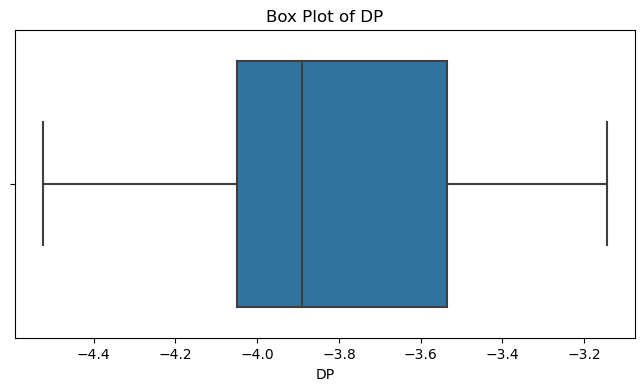

[Large output truncated for GitHub - run notebook to see full results]


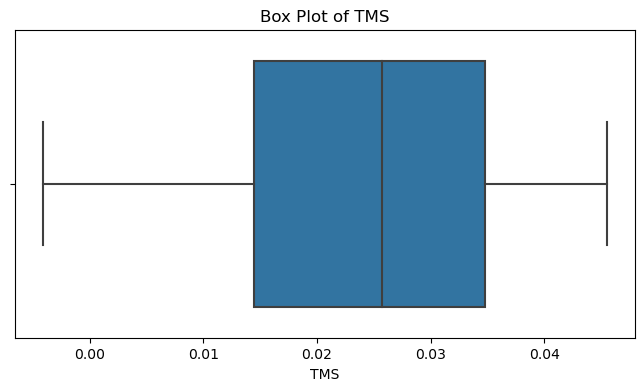

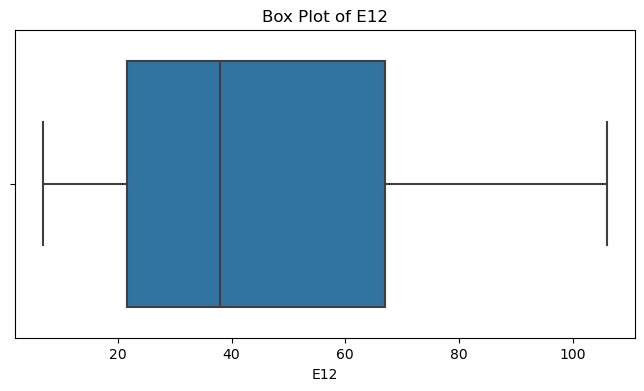

In [113]:
# Box Plots
for var in variables:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[var])
    plt.title(f'Box Plot of {var}')
    plt.xlabel(var)
    plt.show()

In [114]:
# Descriptive Statistics
print(df[variables].describe())

               DP          DY          EP          DE         DFY         DFR  \
count  370.000000  370.000000  370.000000  370.000000  370.000000  370.000000   
mean    -3.829739   -3.823190   -3.040377   -0.789362    0.009966   -0.060232   
std      0.330198    0.331791    0.382289    0.398360    0.003905    0.030330   
min     -4.523640   -4.530894   -4.836478   -1.244209    0.005500   -0.145400   
25%     -4.048781   -4.040492   -3.214153   -1.042070    0.007500   -0.079475   
50%     -3.889194   -3.881753   -2.956909   -0.885120    0.009150   -0.061100   
75%     -3.536228   -3.528676   -2.809001   -0.598504    0.011800   -0.042700   
max     -3.145207   -3.142660   -2.399945    1.379530    0.033800    0.105500   

              TMS          bm        ntis        infl         ltr       Index  \
count  370.000000  370.000000  370.000000  370.000000  370.000000  370.000000   
mean     0.024336    0.327205    0.005058    0.002177    0.007933    0.945409   
std      0.012621    0.1165

In [115]:
# Winsorize specific variables at 1% tails
df.loc[:, 'EP_w1'] = winsorize(df['EP'], limits=[0.01, 0.01])
df.loc[:, 'DE_w1'] = winsorize(df['DE'], limits=[0.01, 0.01])
df.loc[:, 'DFY_w1'] = winsorize(df['DFY'], limits=[0.01, 0.01])
df.loc[:, 'DFR_w1'] = winsorize(df['DFR'], limits=[0.01, 0.01])
df.loc[:, 'infl_w1'] = winsorize(df['infl'], limits=[0.01, 0.01])
df.loc[:, 'ltr_w1'] = winsorize(df['ltr'], limits=[0.01, 0.01])


/var/folders/qh/1n9fzcxn51v7pc65dmdlb9dw0000gn/T/ipykernel_43524/4088509718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'EP_w1'] = winsorize(df['EP'], limits=[0.01, 0.01])
/var/folders/qh/1n9fzcxn51v7pc65dmdlb9dw0000gn/T/ipykernel_43524/4088509718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'DE_w1'] = winsorize(df['DE'], limits=[0.01, 0.01])
/var/folders/qh/1n9fzcxn51v7pc65dmdlb9dw0000gn/T/ipykernel_43524/4088509718.py:4: SettingWithCopyWarning: 
A value is trying to be s

In [116]:
# List of variables to visualize
variables = ['EP_w1', 'DE_w1', 'DFY_w1', 'DFR_w1', 'infl_w1', 'ltr_w1']

# Histograms
for var in variables:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

# Box Plots
for var in variables:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[var])
    plt.title(f'Box Plot of {var}')
    plt.xlabel(var)
    plt.show()

# Descriptive Statistics
print(df[variables].describe())

[Large output truncated for GitHub - run notebook to see full results]


            EP_w1       DE_w1      DFY_w1      DFR_w1     infl_w1      ltr_w1
count  370.000000  370.000000  370.000000  370.000000  370.000000  370.000000
mean    -3.040152   -0.790169    0.009951   -0.060526    0.002210    0.007934
std      0.379461    0.393995    0.003821    0.029079    0.003037    0.028440
min     -4.756238   -1.239419    0.005500   -0.142800   -0.008032   -0.062900
25%     -3.214153   -1.042070    0.007500   -0.079475    0.000587   -0.010575
50%     -2.956909   -0.885120    0.009150   -0.061100    0.002298    0.008450
75%     -2.809001   -0.598504    0.011800   -0.042700    0.004090    0.025400
max     -2.458869    1.226122    0.030000    0.025300    0.009751    0.089600


In [117]:
df.corr()

[Large output truncated for GitHub - run notebook to see full results]


In [134]:
#Create a new DataFrame excluding the 'Excess_Return' column
df_2 = df.drop(columns=['Excess_Return', 'EP', 'DE', 'DFY', 'DFR', 'infl', 'ltr'])

#Create the VIF DataFrame
vif_data = pd.DataFrame() 
vif_data["feature"] = df_2.columns
vif_data["VIF"] = [variance_inflation_factor(df_2.values, i) 
 for i in range(len(df_2.columns))]

print(vif_data)

       feature            VIF
0           DP  208539.886238
1           DY    9370.721825
2          TMS       9.705519
3           bm      32.870562
4         ntis       3.606234
5        Index      96.486546
6          D12     172.460562
7          E12     205.596932
8   EPU_change       1.134348
9        EP_w1  119102.211238
10       DE_w1   10163.532891
11      DFY_w1      33.309177
12      DFR_w1      27.412786
13     infl_w1       1.845787
14      ltr_w1       4.031346


Dividend Price Ratio minus Earnings Price Ratio is equal to Dividend Payout Ratio so remove them both from the dataframe

In [135]:
df_2.drop(columns=['DP', 'EP_w1'], inplace=True)
vif_data = pd.DataFrame() 
vif_data["feature"] = df_2.columns 
vif_data["VIF"] = [variance_inflation_factor(df_2.values, i) 
 for i in range(len(df_2.columns))] 
 
print(vif_data)

       feature         VIF
0           DY  182.666488
1          TMS    9.646400
2           bm   31.495799
3         ntis    3.599109
4        Index   95.747094
5          D12  170.603948
6          E12  202.221225
7   EPU_change    1.066301
8        DE_w1   78.823724
9       DFY_w1   32.281016
10      DFR_w1   23.984387
11     infl_w1    1.845523
12      ltr_w1    3.577742


In [136]:
df_2.corr()

,DY,TMS,bm,ntis,Index,D12,E12,EPU_change,DE_w1,DFY_w1,DFR_w1,infl_w1,ltr_w1
DY,1.000000,0.218744,0.868148,-0.212989,-0.729297,-0.374027,-0.498821,-0.024901,0.458451,0.337864,-0.277204,0.088956,0.085585
TMS,0.218744,1.000000,0.259356,0.263207,-0.096675,0.062654,-0.140138,-0.034284,0.403129,0.282137,0.012842,-0.045877,-0.117914
bm,0.868148,0.259356,1.000000,-0.305631,-0.546255,-0.249036,-0.287867,0.015411,0.286194,0.400801,-0.180391,0.097405,0.114757
ntis,-0.212989,0.263207,-0.305631,1.000000,-0.117209,-0.266540,-0.152070,0.003953,-0.078075,-0.570812,-0.013028,-0.011451,-0.014549
Index,-0.729297,-0.096675,-0.546255,-0.117209,1.000000,0.890455,0.878646,-0.008253,-0.384348,-0.100689,0.466455,-0.171288,-0.093186
D12,-0.374027,0.062654,-0.249036,-0.266540,0.890455,1.000000,0.857331,-0.003864,-0.158979,0.124725,0.484592,-0.199633,-0.074570
E12,-0.498821,-0.140138,-0.287867,-0.152070,0.878646,0.857331,1.000000,0.013384,-0.617444,-0.202595,0.459611,-0.127948,-0.055485
EPU_change,-0.024901,-0.034284,0.015411,0.003953,-0.008253,-0.003864,0.013384,1.000000,-0.043844,-0.059181,-0.079338,0.079998,0.072019
DE_w1,0.458451,0.403129,0.286194,-0.078075,-0.384348,-0.158979,-0.617444,-0.043844,1.000000,0.620527,-0.110439,-0.019434,-0.001068
DFY_w1,0.337864,0.282137,0.400801,-0.570812,-0.100689,0.124725,-0.202595,-0.059181,0.620527,1.000000,0.048430,-0.130718,0.019559


In [137]:
df_2.drop(columns=['E12'], inplace=True)
vif_data = pd.DataFrame() 
vif_data["feature"] = df_2.columns 
vif_data["VIF"] = [variance_inflation_factor(df_2.values, i) 
 for i in range(len(df_2.columns))] 
 
print(vif_data)

       feature         VIF
0           DY  120.075529
1          TMS    9.215463
2           bm   27.164285
3         ntis    3.307431
4        Index   81.451137
5          D12   66.050464
6   EPU_change    1.060129
7        DE_w1   15.152092
8       DFY_w1   31.866556
9       DFR_w1   20.105891
10     infl_w1    1.794673
11      ltr_w1    3.173355


In [138]:
df_2.corr()

,DY,TMS,bm,ntis,Index,D12,EPU_change,DE_w1,DFY_w1,DFR_w1,infl_w1,ltr_w1
DY,1.000000,0.218744,0.868148,-0.212989,-0.729297,-0.374027,-0.024901,0.458451,0.337864,-0.277204,0.088956,0.085585
TMS,0.218744,1.000000,0.259356,0.263207,-0.096675,0.062654,-0.034284,0.403129,0.282137,0.012842,-0.045877,-0.117914
bm,0.868148,0.259356,1.000000,-0.305631,-0.546255,-0.249036,0.015411,0.286194,0.400801,-0.180391,0.097405,0.114757
ntis,-0.212989,0.263207,-0.305631,1.000000,-0.117209,-0.266540,0.003953,-0.078075,-0.570812,-0.013028,-0.011451,-0.014549
Index,-0.729297,-0.096675,-0.546255,-0.117209,1.000000,0.890455,-0.008253,-0.384348,-0.100689,0.466455,-0.171288,-0.093186
D12,-0.374027,0.062654,-0.249036,-0.266540,0.890455,1.000000,-0.003864,-0.158979,0.124725,0.484592,-0.199633,-0.074570
EPU_change,-0.024901,-0.034284,0.015411,0.003953,-0.008253,-0.003864,1.000000,-0.043844,-0.059181,-0.079338,0.079998,0.072019
DE_w1,0.458451,0.403129,0.286194,-0.078075,-0.384348,-0.158979,-0.043844,1.000000,0.620527,-0.110439,-0.019434,-0.001068
DFY_w1,0.337864,0.282137,0.400801,-0.570812,-0.100689,0.124725,-0.059181,0.620527,1.000000,0.048430,-0.130718,0.019559
DFR_w1,-0.277204,0.012842,-0.180391,-0.013028,0.466455,0.484592,-0.079338,-0.110439,0.048430,1.000000,-0.298534,0.635021


In [139]:
df_2.drop(columns=['DY'], inplace=True)
vif_data = pd.DataFrame() 
vif_data["feature"] = df_2.columns 
vif_data["VIF"] = [variance_inflation_factor(df_2.values, i) 
 for i in range(len(df_2.columns))] 
 
print(vif_data)

       feature        VIF
0          TMS   9.215306
1           bm  27.148228
2         ntis   2.231830
3        Index  65.267643
4          D12  64.775579
5   EPU_change   1.049187
6        DE_w1  11.838344
7       DFY_w1  19.022645
8       DFR_w1  11.695751
9      infl_w1   1.752316
10      ltr_w1   2.292047


In [140]:
df_2.drop(columns=['D12'], inplace=True)
vif_data = pd.DataFrame() 
vif_data["feature"] = df_2.columns 
vif_data["VIF"] = [variance_inflation_factor(df_2.values, i) 
 for i in range(len(df_2.columns))] 
 
print(vif_data)

      feature        VIF
0         TMS   9.093463
1          bm  17.724003
2        ntis   2.162166
3       Index   9.173196
4  EPU_change   1.044088
5       DE_w1  10.108028
6      DFY_w1  18.774746
7      DFR_w1  11.215910
8     infl_w1   1.733519
9      ltr_w1   2.236785


In [141]:
df_2.drop(columns=['DFY_w1'], inplace=True)
vif_data = pd.DataFrame() 
vif_data["feature"] = df_2.columns 
vif_data["VIF"] = [variance_inflation_factor(df_2.values, i) 
 for i in range(len(df_2.columns))] 
 
print(vif_data)

      feature        VIF
0         TMS   8.132952
1          bm  14.595493
2        ntis   1.702211
3       Index   6.081199
4  EPU_change   1.028744
5       DE_w1   7.833927
6      DFR_w1   8.887620
7     infl_w1   1.702876
8      ltr_w1   1.960111


In [142]:
df_2.drop(columns=['bm'], inplace=True)
vif_data = pd.DataFrame() 
vif_data["feature"] = df_2.columns 
vif_data["VIF"] = [variance_inflation_factor(df_2.values, i) 
 for i in range(len(df_2.columns))] 
 
print(vif_data)

      feature       VIF
0         TMS  4.701713
1        ntis  1.244807
2       Index  5.757571
3  EPU_change  1.021701
4       DE_w1  7.190519
5      DFR_w1  5.805694
6     infl_w1  1.697275
7      ltr_w1  1.385325


In [143]:
df_2.corr()

,TMS,ntis,Index,EPU_change,DE_w1,DFR_w1,infl_w1,ltr_w1
TMS,1.000000,0.263207,-0.096675,-0.034284,0.403129,0.012842,-0.045877,-0.117914
ntis,0.263207,1.000000,-0.117209,0.003953,-0.078075,-0.013028,-0.011451,-0.014549
Index,-0.096675,-0.117209,1.000000,-0.008253,-0.384348,0.466455,-0.171288,-0.093186
EPU_change,-0.034284,0.003953,-0.008253,1.000000,-0.043844,-0.079338,0.079998,0.072019
DE_w1,0.403129,-0.078075,-0.384348,-0.043844,1.000000,-0.110439,-0.019434,-0.001068
DFR_w1,0.012842,-0.013028,0.466455,-0.079338,-0.110439,1.000000,-0.298534,0.635021
infl_w1,-0.045877,-0.011451,-0.171288,0.079998,-0.019434,-0.298534,1.000000,-0.174488
ltr_w1,-0.117914,-0.014549,-0.093186,0.072019,-0.001068,0.635021,-0.174488,1.000000


In [144]:
formula = 'Excess_Return ~ EPU_change'
model = smf.ols(formula, data=df).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     27.89
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           2.21e-07
Time:                        07:22:14   Log-Likelihood:                 647.94
No. Observations:                 370   AIC:                            -1292.
Df Residuals:                     368   BIC:                            -1284.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0067      0.002      3.072      0.0

1% change in EPU_index i.e. 0.01 increase, results in a -0.0383% change i.e.0.00383 decrease

In [145]:
formula_1 = 'Excess_Return ~ DE_w1 + DFR_w1 + TMS + ntis + infl_w1 + ltr_w1 + Index + EPU_change'
model_1 = smf.ols(formula_1, data=df).fit()
print(model_1.summary()) 

                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     6.930
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           1.68e-08
Time:                        07:22:15   Log-Likelihood:                 660.86
No. Observations:                 370   AIC:                            -1304.
Df Residuals:                     361   BIC:                            -1269.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0788      0.016      4.827      0.0

In [146]:
#To calculate Durbin-Watson statistic
dw_statistic = sm.stats.durbin_watson(model_1.resid)

#Print the Durbin-Watson statistic
print("Durbin-Watson statistic:", dw_statistic)

Durbin-Watson statistic: 2.1696288107648574


In [147]:
# Compute residuals
residuals = model_1.resid

# Create lagged residuals
residuals_lagged = residuals.shift(1)

# Drop NaN values resulting from lagging
residuals = residuals[1:]
residuals_lagged = residuals_lagged[1:]

# Plot u_t against u_t-1
plt.figure(figsize=(10, 6))
plt.scatter(residuals_lagged, residuals, alpha=0.6, edgecolor="k")
plt.title("Residuals (\u03bc_t) vs Lagged Residuals (\u03bc_{t-1})", fontsize=14)
plt.xlabel("Lagged Residuals (\u03bc_{t-1})", fontsize=12)
plt.ylabel("Residuals (\u03bc_t)", fontsize=12)
plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.axvline(0, color="gray", linestyle="--", linewidth=1)
plt.grid(alpha=0.4)
plt.show()

[Large output truncated for GitHub - run notebook to see full results]


In [148]:
name = ['Lagrange multiplier statistic', 'Lagrange multiplier p-value', 'F-statistic', 'F-statistic p-value']
breuschpagan_test = sms.het_breuschpagan(model_1.resid, model_1.model.exog)
lzip(name, breuschpagan_test)

[('Lagrange multiplier statistic', 24.36721484965973),
 ('Lagrange multiplier p-value', 0.001988303624752503),
 ('F-statistic', 3.181326012266497),
 ('F-statistic p-value', 0.0016830318673064426)]

In [149]:
lm, lm_pvalue, fvalue, f_pvalue = het_white(model_1.resid, model_1.model.exog)
print("Lagrange multiplier statistic:",lm)
print("Lagrange multiplier p-value:",lm_pvalue)
print("F-statistic:",fvalue)
print("F-statistic p-value:",f_pvalue)
if lm_pvalue < 0.05:
 print("Rejected the null hypothesis. Heteroscedasticity detected")
else:
 print("Failed to rejected the null hypothesis. No heteroscedasticity detected")

Lagrange multiplier statistic: 125.03943059211579
Lagrange multiplier p-value: 1.0687749742759774e-09
F-statistic: 3.7703484502412032
F-statistic p-value: 2.7281861963597604e-12
Rejected the null hypothesis. Heteroscedasticity detected


In [150]:
y = df['Excess_Return']
var = df[['DE_w1', 'DFR_w1', 'TMS', 'ntis', 'infl_w1', 'ltr_w1', 'Index','EPU_change']]
x = sm.add_constant(var)
sm.stats.diagnostic.het_goldfeldquandt(y, x, drop=0.25)

(1.0760557652640006, 0.35711170876148884, 'increasing')

In [151]:
# Plotting Excess_Return against each predictor
var = df[['DE_w1', 'DFR_w1', 'TMS', 'ntis', 'infl_w1', 'ltr_w1', 'Index','EPU_change']]
plt.figure(figsize=(15, 10))
for i, predictor in enumerate(var, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[predictor], y=model_1.resid)
    plt.title(f'Residual vs {predictor}')
    plt.xlabel(predictor)
    plt.ylabel('Residual')

plt.tight_layout()
plt.show()

[Large output truncated for GitHub - run notebook to see full results]


In [152]:
model_1_robust = smf.ols(formula_1, df).fit(cov_type='HC2')
print(model_1_robust.summary())

                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     5.129
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           4.54e-06
Time:                        07:22:23   Log-Likelihood:                 660.86
No. Observations:                 370   AIC:                            -1304.
Df Residuals:                     361   BIC:                            -1269.
Df Model:                           8                                         
Covariance Type:                  HC2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0788      0.015      5.198      0.0

In [153]:
name = ['Lagrange multiplier statistic', 'Lagrange multiplier p-value', 'F-statistic', 'F-statistic p-value']
breuschpagan_test = sms.het_breuschpagan(model_1_robust.resid, model_1_robust.model.exog)
lzip(name, breuschpagan_test)

[('Lagrange multiplier statistic', 24.36721484965973),
 ('Lagrange multiplier p-value', 0.001988303624752503),
 ('F-statistic', 3.181326012266497),
 ('F-statistic p-value', 0.0016830318673064426)]

In [154]:
lm, lm_pvalue, fvalue, f_pvalue = het_white(model_1_robust.resid, model_1_robust.model.exog)
print("Lagrange multiplier statistic:",lm)
print("Lagrange multiplier p-value:",lm_pvalue)
print("F-statistic:",fvalue)
print("F-statistic p-value:",f_pvalue)
if lm_pvalue < 0.05:
 print("Rejected the null hypothesis. Heteroscedasticity detected")
else:
 print("Failed to rejected the null hypothesis. No heteroscedasticity detected")

Lagrange multiplier statistic: 125.03943059211579
Lagrange multiplier p-value: 1.0687749742759774e-09
F-statistic: 3.7703484502412032
F-statistic p-value: 2.7281861963597604e-12
Rejected the null hypothesis. Heteroscedasticity detected


In [155]:
# Perform the Jarque-Bera test using statsmodels
jb_stat = sms.jarque_bera(model_1_robust.resid)

# Output the results
print(f"Jarque-Bera Test Statistic: {jb_stat}")
print(f"Jarque-Bera p-value: {jb_p_value}")

# Interpretation
if jb_p_value < 0.05:
    print("The residuals are significantly non-normal (reject H0).")
else:
    print("The residuals are normally distributed (fail to reject H0).")

Jarque-Bera Test Statistic: (73.70740838838155, 9.877331524915649e-17, -0.575431510320946, 4.859175998223621)
Jarque-Bera p-value: 0.021914542906467233
The residuals are significantly non-normal (reject H0).


In [156]:
# Plotting residuals vs. fitted values
plt.figure(figsize=(8, 6))
sns.residplot(model_1_robust.fittedvalues, model_1_robust.resid, lowess=True, color='blue', line_kws={'color': 'red', 'lw': 1})

# Title and labels
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Large output truncated for GitHub - run notebook to see full results]


In [159]:
# Histogram of best model residuals (Model 5)
plt.figure(figsize=(8,4), dpi=600)
sns.histplot(model_1_robust.resid, kde=True, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histogram of Residuals')
plt.show()

[Large output truncated for GitHub - run notebook to see full results]


In [42]:
reset_ramsey(model_1_robust,degree = 2)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.7128943215477651, p=0.3990453665308973, df_denom=360, df_num=1>

In [43]:
reset_ramsey(model_1_robust,degree = 3)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=2.3417010929105473, p=0.09763120632993655, df_denom=359, df_num=2>

In [44]:
reset_ramsey(model_1_robust,degree = 4)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=3.8556308622904134, p=0.00974926966875594, df_denom=358, df_num=3>

In [45]:
test = sms.breaks_cusumolsresid(model_1_robust.resid, ddof=model_1_robust.df_model)
name = ['test statistic', 'pval', 'crit']
result_summary = lzip(name, test)
print(result_summary)

[('test statistic', 1.115174169712738), ('pval', 0.16618485439663866), ('crit', [(1, 1.63), (5, 1.36), (10, 1.22)])]


In [46]:
# Example: Create a recession dummy variable based on the given periods
df.loc[:,'recession_dummy'] = 0
df.loc['1990-07-01':'1991-03-01', 'recession_dummy'] = 1  # 1990-1991 recession
df.loc['2001-03-01':'2001-11-01', 'recession_dummy'] = 1  # 2001 recession
df.loc['2007-12-01':'2009-06-01', 'recession_dummy'] = 1  # 2007-2009 recession

/var/folders/qh/1n9fzcxn51v7pc65dmdlb9dw0000gn/T/ipykernel_43524/738151358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'recession_dummy'] = 0


In [47]:
formula_1_dum = 'Excess_Return ~ DE_w1 + DFR_w1 + TMS + ntis + infl_w1 + ltr_w1 + Index + EPU_change + recession_dummy'
model_1_dum = smf.ols(formula_1_dum, data=df).fit()
print(model_1_dum.summary()) 

                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     6.842
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           4.25e-09
Time:                        22:27:04   Log-Likelihood:                 663.64
No. Observations:                 370   AIC:                            -1307.
Df Residuals:                     360   BIC:                            -1268.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0817      0.016     

In [48]:
#Plot time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Excess_Return'], label="Excess Returns", color="blue", linewidth=1.5)
plt.axhline(0, color="red", linestyle="--", linewidth=1, label="Zero Line")
plt.title("Excess Returns Over Time", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Excess Returns", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

[Large output truncated for GitHub - run notebook to see full results]


In [49]:
# Plot residuals over time
plt.figure(figsize=(12, 6))
plt.plot(model_1_robust.resid.index, model_1_robust.resid, marker="o", linestyle="-", alpha=0.7)
plt.title("Residuals  Over Time", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Residuals (\u03bc_t)", fontsize=12)
plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.grid(alpha=0.4)
plt.show()

[Large output truncated for GitHub - run notebook to see full results]


In [50]:
# Filter the data where Excess_Return is less than -0.124156, >3 STD from mean
filtered_data = df[df['Excess_Return'] < -0.124156]

# Display the filtered data
print(filtered_data)

                  DP        DY        EP        DE     DFY     DFR     TMS  \
Date                                                                         
1987-10-01 -3.364124 -3.609552 -2.730906 -0.633218  0.0110 -0.0545  0.0313   
1998-08-01 -4.086603 -4.244189 -3.216473 -0.870130  0.0062 -0.0563  0.0057   
2008-10-01 -3.519168 -3.704804 -3.303848 -0.215319  0.0260 -0.1078  0.0411   

                  bm      ntis      infl  ...        E12  EPU_change  \
Date                                      ...                          
1987-10-01  0.494851  0.010478  0.002609  ...  16.406700    1.104525   
1998-08-01  0.211432  0.028519  0.001225  ...  38.383333    0.290485   
2008-10-01  0.334099 -0.055954 -0.010101  ...  35.593333    0.036004   

            Excess_Return     EP_w1     DE_w1  DFY_w1  DFR_w1   infl_w1  \
Date                                                                      
1987-10-01      -0.221795 -2.730906 -0.633218  0.0110 -0.0545  0.002609   
1998-08-01      -0.1474

In [51]:
def get_rss(data):
#inputs:
#data: a pandas DataFrame of independent and dependent variable
#outputs:
#rss: the sum of residuals
#N: the observations of inputs
#K: total number of parameters

    formula = 'Excess_Return ~ DE_w1 + DFR_w1 + TMS + ntis + infl_w1 + ltr_w1 + Index + EPU_change'
    results = smf.ols(formula, data).fit()
    rss = (results.resid**2).sum() # obtain the residuals sum of square
    N = results.nobs
    K = results.df_model
    return rss, N, K

In [52]:
data1 = df[:'1987-10-01']
data2 = df['1987-11-01':]
# get rss of whole sample
RSS_total, N_total, K_total = get_rss(df)
# get rss of the first part of sample
RSS_1, N_1, K_1 = get_rss(data1)
# get rss of the second part of sample
RSS_2, N_2, K_2 = get_rss(data2)
print(RSS_total, N_total, K_total)
print(RSS_1, N_1, K_1 )
print(RSS_2, N_2, K_2 )
print(f"F(K,T-2K)=F({K_total},{N_1+N_2-2*K_total})")
nominator = (RSS_total - (RSS_1 + RSS_2)) / K_total
denominator = (RSS_1 + RSS_2) / (N_1 + N_2 - 2*K_total)
F_stat = nominator/denominator
print(F_stat)

0.6085955278899184 370.0 8.0
0.04256000165661507 32.0 8.0
0.49598956806385225 338.0 8.0
F(K,T-2K)=F(8.0,354.0)
5.75533585628342


In [53]:
data1 = df[:'1998-08-01']
data2 = df['1998-09-01':]
# get rss of whole sample
RSS_total, N_total, K_total = get_rss(df)
# get rss of the first part of sample
RSS_1, N_1, K_1 = get_rss(data1)
# get rss of the second part of sample
RSS_2, N_2, K_2 = get_rss(data2)
print(RSS_total, N_total, K_total)
print(RSS_1, N_1, K_1 )
print(RSS_2, N_2, K_2 )
print(f"F(K,T-2K)=F({K_total},{N_1+N_2-2*K_total})")
nominator = (RSS_total - (RSS_1 + RSS_2)) / K_total
denominator = (RSS_1 + RSS_2) / (N_1 + N_2 - 2*K_total)
F_stat = nominator/denominator
print(F_stat)

0.6085955278899184 370.0 8.0
0.22295420969104884 162.0 8.0
0.2766915966779976 208.0 8.0
F(K,T-2K)=F(8.0,354.0)
9.648885502178517


In [54]:
data1 = df[:'2008-10-01']
data2 = df['2008-11-01':]
# get rss of whole sample
RSS_total, N_total, K_total = get_rss(df)
# get rss of the first part of sample
RSS_1, N_1, K_1 = get_rss(data1)
# get rss of the second part of sample
RSS_2, N_2, K_2 = get_rss(data2)
print(RSS_total, N_total, K_total)
print(RSS_1, N_1, K_1 )
print(RSS_2, N_2, K_2 )
print(f"F(K,T-2K)=F({K_total},{N_1+N_2-2*K_total})")
nominator = (RSS_total - (RSS_1 + RSS_2)) / K_total
denominator = (RSS_1 + RSS_2) / (N_1 + N_2 - 2*K_total)
F_stat = nominator/denominator
print(F_stat)

0.6085955278899184 370.0 8.0
0.4571926577606587 284.0 8.0
0.10789524253426941 86.0 8.0
F(K,T-2K)=F(8.0,354.0)
3.4069257545127516


In [55]:
# Create the dummy variables for each crisis
df.loc[:,'dummy_Black_Monday_1987'] = ((df.index >= '1987-10-01') & (df.index <= '1987-10-31')).astype(int)
df.loc[:,'dummy_Asia_1998'] = ((df.index >= '1998-08-01') & (df.index <= '1998-08-31')).astype(int)
df.loc[:,'dummy_Recession_2008'] = ((df.index >= '2008-10-01') & (df.index<= '2008-10-31')).astype(int)

/var/folders/qh/1n9fzcxn51v7pc65dmdlb9dw0000gn/T/ipykernel_43524/2698518990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'dummy_Black_Monday_1987'] = ((df.index >= '1987-10-01') & (df.index <= '1987-10-31')).astype(int)
/var/folders/qh/1n9fzcxn51v7pc65dmdlb9dw0000gn/T/ipykernel_43524/2698518990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'dummy_Asia_1998'] = ((df.index >= '1998-08-01') & (df.index <= '1998-08-31')).astype(int)
/var/folders/qh/1n9fzcxn51v7pc65dmdlb9dw0000gn/T

In [56]:
formula_1_dum = 'Excess_Return ~ DE_w1 + DFR_w1 + TMS + ntis + infl_w1 + ltr_w1 + Index + EPU_change + dummy_Black_Monday_1987 + dummy_Asia_1998 + dummy_Recession_2008 + recession_dummy '
model_1_dum = smf.ols(formula_1_dum, data=df).fit()
print(model_1_dum.summary()) 

                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     10.36
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           1.43e-17
Time:                        22:27:16   Log-Likelihood:                 689.69
No. Observations:                 370   AIC:                            -1353.
Df Residuals:                     357   BIC:                            -1303.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [57]:
test = sms.breaks_cusumolsresid(model_1_dum.resid, ddof=model_1_dum.df_model)
name = ['test statistic', 'pval', 'crit']
result_summary = lzip(name, test)
print(result_summary)

[('test statistic', 1.1326853222168027), ('pval', 0.1536222213428689), ('crit', [(1, 1.63), (5, 1.36), (10, 1.22)])]


In [59]:
#To calculate Durbin-Watson statistic
dw_statistic = sm.stats.durbin_watson(model_1_dum.resid)

#Print the Durbin-Watson statistic
print("Durbin-Watson statistic:", dw_statistic)

Durbin-Watson statistic: 2.295471562893854


In [60]:
# Compute residuals
residuals = model_1_dum.resid

# Create lagged residuals
residuals_lagged = residuals.shift(1)

# Drop NaN values resulting from lagging
residuals = residuals[1:]
residuals_lagged = residuals_lagged[1:]

# Plot u_t against u_t-1
plt.figure(figsize=(10, 6))
plt.scatter(residuals_lagged, residuals, alpha=0.6, edgecolor="k")
plt.title("Residuals (\u03bc_t) vs Lagged Residuals (\u03bc_{t-1})", fontsize=14)
plt.xlabel("Lagged Residuals (\u03bc_{t-1})", fontsize=12)
plt.ylabel("Residuals (\u03bc_t)", fontsize=12)
plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.axvline(0, color="gray", linestyle="--", linewidth=1)
plt.grid(alpha=0.4)
plt.show()

[Large output truncated for GitHub - run notebook to see full results]


In [61]:
name = ['Lagrange multiplier statistic', 'Lagrange multiplier p-value', 'F-statistic', 'F-statistic p-value']
breuschpagan_test = sms.het_breuschpagan(model_1_dum.resid, model_1_dum.model.exog)
lzip(name, breuschpagan_test)

[('Lagrange multiplier statistic', 18.48290855806115),
 ('Lagrange multiplier p-value', 0.10179511041708182),
 ('F-statistic', 1.564266839335586),
 ('F-statistic p-value', 0.10001868295691886)]

In [62]:
lm, lm_pvalue, fvalue, f_pvalue = het_white(model_1_dum.resid, model_1_dum.model.exog)
print("Lagrange multiplier statistic:",lm)
print("Lagrange multiplier p-value:",lm_pvalue)
print("F-statistic:",fvalue)
print("F-statistic p-value:",f_pvalue)
if lm_pvalue < 0.05:
 print("Rejected the null hypothesis. Heteroscedasticity detected")
else:
 print("Failed to rejected the null hypothesis. No heteroscedasticity detected")

Lagrange multiplier statistic: 100.99738289949597
Lagrange multiplier p-value: 0.0002160590628905104
F-statistic: 2.0985046000853176
F-statistic p-value: 3.705829802132931e-05
Rejected the null hypothesis. Heteroscedasticity detected


In [63]:
y = df['Excess_Return']
var = df[['DE_w1', 'DFR_w1', 'TMS', 'ntis', 'infl_w1', 'ltr_w1', 'Index','EPU_change', 'dummy_Black_Monday_1987', 'dummy_Asia_1998', 'dummy_Recession_2008']]
x = sm.add_constant(var)
sm.stats.diagnostic.het_goldfeldquandt(y, x, drop=0.25)

(1.2329928767324256, 0.1420277431100456, 'increasing')

In [64]:
# Plotting Excess_Return against each predictor
var = df[['DE_w1', 'DFR_w1', 'TMS', 'ntis', 'infl_w1', 'ltr_w1', 'Index','EPU_change', 'dummy_Black_Monday_1987', 'dummy_Asia_1998', 'dummy_Recession_2008', 'recession_dummy']]
plt.figure(figsize=(15, 10))
for i, predictor in enumerate(var, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(x=df[predictor], y=model_1_dum.resid)
    plt.title(f'Residual vs {predictor}')
    plt.xlabel(predictor)
    plt.ylabel('Residual')

plt.tight_layout()
plt.show()

[Large output truncated for GitHub - run notebook to see full results]


In [65]:
model_1_dum_robust = smf.ols(formula_1_dum, df).fit(cov_type='HC3')
print(model_1_dum_robust.summary())

                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     4.278
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           2.43e-06
Time:                        22:27:46   Log-Likelihood:                 689.69
No. Observations:                 370   AIC:                            -1353.
Df Residuals:                     357   BIC:                            -1303.
Df Model:                          12                                         
Covariance Type:                  HC3                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [66]:
name = ['Lagrange multiplier statistic', 'Lagrange multiplier p-value', 'F-statistic', 'F-statistic p-value']
breuschpagan_test = sms.het_breuschpagan(model_1_dum_robust.resid, model_1_dum_robust.model.exog)
lzip(name, breuschpagan_test)

[('Lagrange multiplier statistic', 18.48290855806115),
 ('Lagrange multiplier p-value', 0.10179511041708182),
 ('F-statistic', 1.564266839335586),
 ('F-statistic p-value', 0.10001868295691886)]

In [67]:
lm, lm_pvalue, fvalue, f_pvalue = het_white(model_1_dum_robust.resid, model_1_dum_robust.model.exog)
print("Lagrange multiplier statistic:",lm)
print("Lagrange multiplier p-value:",lm_pvalue)
print("F-statistic:",fvalue)
print("F-statistic p-value:",f_pvalue)
if lm_pvalue < 0.05:
 print("Rejected the null hypothesis. Heteroscedasticity detected")
else:
 print("Failed to rejected the null hypothesis. No heteroscedasticity detected")

Lagrange multiplier statistic: 100.99738289949597
Lagrange multiplier p-value: 0.0002160590628905104
F-statistic: 2.0985046000853176
F-statistic p-value: 3.705829802132931e-05
Rejected the null hypothesis. Heteroscedasticity detected


In [68]:
# Perform the Jarque-Bera test using statsmodels
jb_stat = sms.jarque_bera(model_1_dum_robust.resid)

# Output the results
print(f"Jarque-Bera Test Statistic: {jb_stat}")
print(f"Jarque-Bera p-value: {jb_p_value}")

# Interpretation
if jb_p_value < 0.05:
    print("The residuals are significantly non-normal (reject H0).")
else:
    print("The residuals are normally distributed (fail to reject H0).")

Jarque-Bera Test Statistic: (8.464101014657757, 0.014522581337391339, -0.18026011639448325, 3.647339115354642)


NameError: name 'jb_p_value' is not defined

In [69]:
# Plotting residuals vs. fitted values
plt.figure(figsize=(8, 6))
sns.residplot(model_1_dum_robust.fittedvalues, model_1_dum_robust.resid, lowess=True, color='blue', line_kws={'color': 'red', 'lw': 1})

# Title and labels
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Large output truncated for GitHub - run notebook to see full results]


In [160]:
# Histogram of best model residuals (Model 5)
plt.figure(figsize=(8,4), dpi=600)
sns.histplot(model_1_dum_robust.resid, kde=True, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histogram of Residuals')
plt.show()

[Large output truncated for GitHub - run notebook to see full results]


In [71]:
reset_ramsey(model_1_dum_robust,degree = 2)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.6856721503031961, p=0.4081951157406788, df_denom=356, df_num=1>

In [72]:
reset_ramsey(model_1_dum_robust,degree = 3)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.8072084681361655, p=0.44691870820409596, df_denom=355, df_num=2>

In [73]:
reset_ramsey(model_1_dum_robust,degree = 4)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=1.9760500342470468, p=0.11722174474525483, df_denom=354, df_num=3>

In [74]:
residuals = model_1_dum_robust.resid  # Replace with your model's residuals

# Q-Q plot
sm.qqplot(residuals, line ='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

[Large output truncated for GitHub - run notebook to see full results]


In [75]:
# Calculate residuals from your model
residuals = model_1_dum_robust.resid

# Estimate the standard deviation of residuals
std_residuals = residuals.std()

print(f"Standard Deviation of Residuals: {std_residuals}")

Standard Deviation of Residuals: 0.03756760246528011


In [76]:
weights = 1 / (residuals**2)  # Inverse of squared residuals
wls_model = smf.wls(formula_1_dum, data=df, weights=weights**2).fit()
print(wls_model.summary())

                            WLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.443e+32
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        22:27:56   Log-Likelihood:                -8364.4
No. Observations:                 370   AIC:                         1.673e+04
Df Residuals:                     367   BIC:                         1.675e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [77]:
formula_1 = 'Excess_Return ~ DE_w1 + DFR_w1 + TMS + ntis + infl_w1 + ltr_w1 + Index + EPU_change + dummy_Black_Monday_1987 + dummy_Asia_1998 + dummy_Recession_2008 + recession_dummy'
model_1 = smf.ols(formula_1, df).fit(cov_type='HC3')
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     4.278
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           2.43e-06
Time:                        22:27:57   Log-Likelihood:                 689.69
No. Observations:                 370   AIC:                            -1353.
Df Residuals:                     357   BIC:                            -1303.
Df Model:                          12                                         
Covariance Type:                  HC3                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [78]:
formula_2 = 'Excess_Return ~ DFR_w1 + TMS + ntis + infl_w1 + ltr_w1 + Index + EPU_change + dummy_Black_Monday_1987 + dummy_Asia_1998 + dummy_Recession_2008 + recession_dummy'
model_2 = smf.ols(formula_2, data=df).fit(cov_type='HC3')
print(model_2.summary()) 

                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     3.839
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           3.04e-05
Time:                        22:27:58   Log-Likelihood:                 689.55
No. Observations:                 370   AIC:                            -1355.
Df Residuals:                     358   BIC:                            -1308.
Df Model:                          11                                         
Covariance Type:                  HC3                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [79]:
formula_3 = 'Excess_Return ~ DFR_w1 + TMS + infl_w1 + ltr_w1 + Index + EPU_change + dummy_Black_Monday_1987 + dummy_Asia_1998 + dummy_Recession_2008 + recession_dummy'
model_3 = smf.ols(formula_3, data=df).fit(cov_type='HC3')
print(model_3.summary()) 

                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     4.386
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           8.03e-06
Time:                        22:27:58   Log-Likelihood:                 689.33
No. Observations:                 370   AIC:                            -1357.
Df Residuals:                     359   BIC:                            -1314.
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [80]:
formula_4 = 'Excess_Return ~ DFR_w1 + TMS + ltr_w1 + Index + EPU_change + dummy_Black_Monday_1987 + dummy_Asia_1998 + dummy_Recession_2008 + recession_dummy'
model_4 = smf.ols(formula_4, data=df).fit(cov_type='HC3')
print(model_4.summary()) 

                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     4.605
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           8.95e-06
Time:                        22:28:00   Log-Likelihood:                 688.98
No. Observations:                 370   AIC:                            -1358.
Df Residuals:                     360   BIC:                            -1319.
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [81]:
#Create an empty list to store the test results
jb_results = []

#List of models
models = [model_1_dum_robust, model_2, model_3, model_4]

#Loop through each model to calculate Jarque-Bera test statistics and p-values
for i, model in enumerate(models, start=1):
    # Get the residuals for the model
    residuals = model.resid
    
    #Perform the Jarque-Bera test using statsmodels (sm)
    jb_result = sm.stats.jarque_bera(residuals)
    
    #Extract the test statistic and p-value from the result tuple
    jb_stat, jb_p_value = jb_result[0], jb_result[1]
    
    #Append the results to the list
    jb_results.append({
        'Model': f'model_{i}',
        'Jarque-Bera Statistic': jb_stat,
        'p-value': jb_p_value
    })

#Create a DataFrame to display the results
jb_results_df = pd.DataFrame(jb_results)

#Display the table
jb_results_df

,Model,Jarque-Bera Statistic,p-value
0,model_1,8.464101,0.014523
1,model_2,8.771239,0.012455
2,model_3,8.185628,0.016692
3,model_4,7.641210,0.021915


In [82]:
import matplotlib.pyplot as plt

# Compute residuals
residuals = model_4.resid

# Create lagged residuals
residuals_lagged = residuals.shift(1)

# Drop NaN values resulting from lagging
residuals = residuals[1:]
residuals_lagged = residuals_lagged[1:]

# Plot u_t against u_t-1
plt.figure(figsize=(10, 6))
plt.scatter(residuals_lagged, residuals, alpha=0.6, edgecolor="k")
plt.title("Residuals (\u03bc_t) vs Lagged Residuals (\u03bc_{t-1})", fontsize=14)
plt.xlabel("Lagged Residuals (\u03bc_{t-1})", fontsize=12)
plt.ylabel("Residuals (\u03bc_t)", fontsize=12)
plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.axvline(0, color="gray", linestyle="--", linewidth=1)
plt.grid(alpha=0.4)
plt.show()

# Plot residuals over time
plt.figure(figsize=(10, 6))
plt.plot(residuals.index, residuals, marker="o", linestyle="-", alpha=0.7)
plt.title("Residuals  Over Time", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Residuals (\u03bc_t)", fontsize=12)
plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.grid(alpha=0.4)
plt.show()


[Large output truncated for GitHub - run notebook to see full results]


In [161]:
# Histogram of best model residuals (Model 5)
plt.figure(figsize=(8,4), dpi=600)
sns.histplot(model_4.resid, kde=True, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histogram of Residuals')
plt.show()

[Large output truncated for GitHub - run notebook to see full results]


In [162]:
# Plotting residuals vs. fitted values
plt.figure(figsize=(8, 6))
sns.residplot(model_4.fittedvalues, model_1_dum_robust.resid, lowess=True, color='blue', line_kws={'color': 'red', 'lw': 1})

# Title and labels
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Large output truncated for GitHub - run notebook to see full results]


In [83]:
# Extract fitted values and actual values (dependent variable)
fitted_values = model_4.fittedvalues
actual_values = df['Excess_Return']

# Plot fitted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, fitted_values, alpha=0.6, edgecolor="k")
plt.plot(fitted_values, fitted_values, color='red', label='Perfect Fit') 
plt.title("Fitted Values vs Actual Values", fontsize=14)
plt.xlabel("Actual Values (Excess_Return)", fontsize=12)
plt.ylabel("Fitted Values", fontsize=12)
plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.axvline(0, color="gray", linestyle="--", linewidth=1)
plt.grid(alpha=0.4)
plt.show()

[Large output truncated for GitHub - run notebook to see full results]


In [84]:
def recursive_reg(variable, i, interval):
     formula = 'Excess_Return ~ DFR_w1 + TMS + ltr_w1 + Index + EPU_change + dummy_Black_Monday_1987 + dummy_Asia_1998 + dummy_Recession_2008 + recession_dummy'
     results = smf.ols(formula, df.iloc[:i+interval]).fit()
     coeff = results.params[variable]
     se = results.bse[variable] # bse: standard errors of the coefficients
     return coeff, se


In [85]:
parameters = []
for i in range(360):
 coeff, se = recursive_reg('DFR_w1', i, 11)
 parameters.append((coeff,se))
parameters = pd.DataFrame(parameters, columns=['coeff','se'], index = df[:-10].index)
parameters['DFR_w1 + 2*se'] = parameters['coeff'] + 2*parameters['se']
parameters['DFR_w1 - 2*se'] = parameters['coeff'] - 2*parameters['se']
plt.figure(1, dpi=600)
plt.plot(parameters['coeff'], label=r'$\beta_{DFR w1}$')
plt.plot(parameters['DFR_w1 + 2*se'], label=r'$\beta_{DFR w1} + 2*SE$', linestyle='dashed')
plt.plot(parameters['DFR_w1 - 2*se'], label=r'$\beta_{DFR w1} - 2*SE$', linestyle='dashed')
plt.xlabel('Date')
plt.grid(True)
plt.legend()
plt.show()

[Large output truncated for GitHub - run notebook to see full results]


In [86]:
parameters = []
for i in range(360):
 coeff, se = recursive_reg('TMS', i, 11)
 parameters.append((coeff,se))
parameters = pd.DataFrame(parameters, columns=['coeff','se'], index = df[:-10].index)
parameters['TMS + 2*se'] = parameters['coeff'] + 2*parameters['se']
parameters['TMS - 2*se'] = parameters['coeff'] - 2*parameters['se']
plt.figure(1, dpi=600)
plt.plot(parameters['coeff'], label=r'$\beta_{TMS}$')
plt.plot(parameters['TMS + 2*se'], label=r'$\beta_{TMS} + 2*SE$', linestyle='dashed')
plt.plot(parameters['TMS - 2*se'], label=r'$\beta_{TMS} - 2*SE$', linestyle='dashed')
plt.xlabel('Date')
plt.grid(True)
plt.legend()
plt.show()

[Large output truncated for GitHub - run notebook to see full results]


In [87]:
parameters = []
for i in range(360):
 coeff, se = recursive_reg('ltr_w1', i, 11)
 parameters.append((coeff,se))
parameters = pd.DataFrame(parameters, columns=['coeff','se'], index = df[:-10].index)
parameters['ltr_w1 + 2*se'] = parameters['coeff'] + 2*parameters['se']
parameters['ltr_w1 - 2*se'] = parameters['coeff'] - 2*parameters['se']
plt.figure(1, dpi=600)
plt.plot(parameters['coeff'], label=r'$\beta_{ltr w1}$')
plt.plot(parameters['ltr_w1 + 2*se'], label=r'$\beta_{ltr w1} + 2*SE$', linestyle='dashed')
plt.plot(parameters['ltr_w1 - 2*se'], label=r'$\beta_{ltr w1} - 2*SE$', linestyle='dashed')
plt.xlabel('Date')
plt.grid(True)
plt.legend()
plt.show()

[Large output truncated for GitHub - run notebook to see full results]


In [88]:
parameters = []
for i in range(360):
 coeff, se = recursive_reg('Index', i, 11)
 parameters.append((coeff,se))
parameters = pd.DataFrame(parameters, columns=['coeff','se'], index = df[:-10].index)
parameters['Index + 2*se'] = parameters['coeff'] + 2*parameters['se']
parameters['Index - 2*se'] = parameters['coeff'] - 2*parameters['se']
plt.figure(1, dpi=600)
plt.plot(parameters['coeff'], label=r'$\beta_{Index}$')
plt.plot(parameters['Index + 2*se'], label=r'$\beta_{Index} + 2*SE$', linestyle='dashed')
plt.plot(parameters['Index - 2*se'], label=r'$\beta_{Index} - 2*SE$', linestyle='dashed')
plt.xlabel('Date')
plt.grid(True)
plt.legend()
plt.show()

[Large output truncated for GitHub - run notebook to see full results]


In [89]:
parameters = []
for i in range(360):
 coeff, se = recursive_reg('EPU_change', i, 11)
 parameters.append((coeff,se))
parameters = pd.DataFrame(parameters, columns=['coeff','se'], index = df[:-10].index)
parameters['EPU_change + 2*se'] = parameters['coeff'] + 2*parameters['se']
parameters['EPU_change - 2*se'] = parameters['coeff'] - 2*parameters['se']
plt.figure(1, dpi=600)
plt.plot(parameters['coeff'], label=r'$\beta_{EPU change}$')
plt.plot(parameters['EPU_change + 2*se'], label=r'$\beta_{EPU change} + 2*SE$', linestyle='dashed')
plt.plot(parameters['EPU_change - 2*se'], label=r'$\beta_{EPU change} - 2*SE$', linestyle='dashed')
plt.xlabel('Date')
plt.grid(True)
plt.legend()
plt.show()

[Large output truncated for GitHub - run notebook to see full results]


In [91]:
name = ['Lagrange multiplier statistic', 'Lagrange multiplier p-value', 'F-statistic', 'F-statistic p-value']
breuschpagan_test = sms.het_breuschpagan(model_4.resid, model_4.model.exog)
lzip(name, breuschpagan_test)

[('Lagrange multiplier statistic', 17.059213429138016),
 ('Lagrange multiplier p-value', 0.047796734342009956),
 ('F-statistic', 1.9333796578042068),
 ('F-statistic p-value', 0.046311638392202065)]

In [92]:
lm, lm_pvalue, fvalue, f_pvalue = het_white(model_1_dum.resid, model_1_dum.model.exog)
print("Lagrange multiplier statistic:",lm)
print("Lagrange multiplier p-value:",lm_pvalue)
print("F-statistic:",fvalue)
print("F-statistic p-value:",f_pvalue)
if lm_pvalue < 0.05:
 print("Rejected the null hypothesis. Heteroscedasticity detected")
else:
 print("Failed to rejected the null hypothesis. No heteroscedasticity detected")

Lagrange multiplier statistic: 100.99738289949597
Lagrange multiplier p-value: 0.0002160590628905104
F-statistic: 2.0985046000853176
F-statistic p-value: 3.705829802132931e-05
Rejected the null hypothesis. Heteroscedasticity detected


In [90]:
# Winsorize specific variables at 2.5% tails
df.loc[:, 'EP_w5'] = winsorize(df['EP'], limits=[0.025, 0.025])
df.loc[:, 'DE_w5'] = winsorize(df['DE'], limits=[0.025, 0.025])
df.loc[:, 'DFY_w5'] = winsorize(df['DFY'], limits=[0.025, 0.025])
df.loc[:, 'DFR_w5'] = winsorize(df['DFR'], limits=[0.025, 0.025])
df.loc[:, 'infl_w5'] = winsorize(df['infl'], limits=[0.025, 0.025])
df.loc[:, 'ltr_w5'] = winsorize(df['ltr'], limits=[0.025, 0.025])

/var/folders/qh/1n9fzcxn51v7pc65dmdlb9dw0000gn/T/ipykernel_43524/2221667939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'EP_w5'] = winsorize(df['EP'], limits=[0.025, 0.025])
/var/folders/qh/1n9fzcxn51v7pc65dmdlb9dw0000gn/T/ipykernel_43524/2221667939.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'DE_w5'] = winsorize(df['DE'], limits=[0.025, 0.025])
/var/folders/qh/1n9fzcxn51v7pc65dmdlb9dw0000gn/T/ipykernel_43524/2221667939.py:4: SettingWithCopyWarning: 
A value is trying to 